# Hackathon

The L7 AI Hackathon will give you an opportunity to work in a team of four/five to test your new data science and ML skills. You will be required to deliver a 15mins presentation (10mins presentation and 5mins for Q&A) about your learning journey in the programme & the outcome of your work.

You are going to be provided with a sample of possible questions to investigate and tasks to undertake. However, you are free to design your own tasks as a team and augment the initial datasets for your own analysis.

In this hackathon, we want you to build machine learning models to predict COVID-19 infections from symptoms. It has several applications – for example, triaging patients to be attended by a doctor or nurse, recommending self-isolation through contact tracing apps, etc.

Zoabi et al. ([link here](https://www.nature.com/articles/s41746-020-00372-6)) [1] builds a decision tree classifier using the publicly available data reported by the Israeli Ministry of Health. The paper itself discusses the various challenges encountered in deploying such a model. We encourage you to read the paper and learn the challenges and ways to overcome them. We will be using the dataset in this paper (Github link in the references).

## References

[1] Zoabi, Y., Deri-Rozov, S. & Shomron, N. Machine learning-based prediction of COVID-19 diagnosis based on symptoms. npj Digit. Med. 4, 3 (2021).

[2] [Github link](https://github.com/nshomron/covidpred/tree/master) referenced in the paper. The main page of the Github repository mentions that the data file, `corona_tested_individuals_ver_006.english.csv.zip` was the version they used for the analysis. It is also the version we will use for this hackathon.

## Presentation

On Day 2, between 3-5PM, your team will deliver a presentation of your findings and experience for 10 minutes followed by 5 minutes of Q&A from your peers.

The presentation should cover (non-exhaustively) the following components:

- Briefly define the problem
- Briefly describe the dataset
- What did you learn about various models/techniques/etc.?
- What’s the AUC score of your final model?

Below are a list of potential questions and directions that you can explore but you are free and encouraged to be creative and explore other directions to apply your ML skills

## Exploratory Data Analysis

- Think about possible biases and limitations of this dataset. What are the sources of uncertainty?
- What is the format of feature values?
- What is the statistics of these feature values? How many symptoms are reported or not?
- Which symptoms have a reporting bias, i.e., likely to be reported when the patient is COVID positive?
- How will the symptoms with reporting bias affect the model’s performance?
- Visualization: Draw the bar graph of features grouped by the target class?
- What does the bar graph of the symptoms with reporting bias look like?
- Determine if we have a class imbalance in the dataset? If so, what do you reckon will be the downstream challenges in evaluating the model? How will you overcome those challenges?

## Feature Engineering

- How will you represent the features in numerical format that can be accessible by model?
- Are there any redundancies in your feature representation?

## Models

- Check out various classifiers in sklearn or any other preferred library to build your models

## Evaluate

- Is accuracy the right metric to evaluate the model? Are inaccuracies correctly penalized in the accuracy metric?
- Which dataset should you choose to evaluate the model? Validation or Test?
- What other metric is relevant in our context?

For benchmarking everyone’s results we will stick to ROC-AUC score as a metric.

## Report your result

- With the metric chosen, report your result on the test dataset.
- How will you select the threshold for your model above which model score will be interpreted as a prediction of positive diagnosis.

## Extras

- Dimensionality Reduction for fun: Can you reduce the dimension to just 2 dimensions and check if the inputs corresponding to different classes belong to different clusters? Try using t-SNE or UMAP for that purpose.
- Collaborate with Ensemble: Can you combine other models?

# Start

In [50]:
import pandas as pd

RANDOM_STATE=137

In [51]:
dtype = {
    'cough': 'float32',
    'fever': 'float32',
    'sore_throat': 'float32',
    'shortness_of_breath': 'float32',
    'head_ache': 'float32',
    'corona_result': 'str',
    'age_60_and_above': 'str',
    'gender': 'str',
    'test_indication': 'str'
}
covid = pd.read_csv('data/corona_dataset_preprocessed.csv')
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274702 entries, 0 to 274701
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   test_date              274702 non-null  object
 1   cough                  274702 non-null  int64 
 2   fever                  274702 non-null  int64 
 3   sore_throat            274702 non-null  int64 
 4   shortness_of_breath    274702 non-null  int64 
 5   head_ache              274702 non-null  int64 
 6   test_indication        274702 non-null  object
 7   encoded_corona_result  274702 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 16.8+ MB


In [52]:
covid.isna().sum()

test_date                0
cough                    0
fever                    0
sore_throat              0
shortness_of_breath      0
head_ache                0
test_indication          0
encoded_corona_result    0
dtype: int64

In [53]:
# covid = covid.drop(columns=['age_60_and_above', 'gender', 'test_date'])

In [54]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metric
from sklearn.metrics import roc_auc_score

In [55]:
# TODO: (Feature engineer) Binarisation of "confirmed_contact" feature (and "abroad") - kind of done

# TODO: Plot precision recall curve - Done

# TODO: (Address class imbalancing) SMOTE - GB - Done

# TODO: Stacking classifier - GB

In [56]:
# Binarisation of confirmed_contact

# confirmed_contact = [1 if value == "Contact with confirmed" else 0 for value in covid['test_indication']]
# abroad = [1 if value == "Abroad" else 0 for value in covid['test_indication']]

In [57]:
# covid["confirmed_contact"] = confirmed_contact
# covid["abroad"] = abroad

# covid = covid.drop(columns=["test_indication"])

In [58]:
# covid.loc[covid['encoded_corona_result'] == 1]

In [59]:
num_features = [
    'cough', 
    'fever', 
    'sore_throat', 
    'shortness_of_breath', 
    'head_ache', 
    # 'confirmed_contact', 
    # 'abroad'
]
cat_features = [
    'test_indication', 
    # 'age_60_and_above', 
    # 'gender'
]

num_transformer = Pipeline([
    # ('imputer', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline([
    ('encoder', OneHotEncoder()),
    # ("selector", SelectPercentile(chi2, percentile=50))
])

preprocessor = ColumnTransformer(
    transformers=[
        # ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    # ('scaler', 'passthrough'),
    # ('classifier', LogisticRegression(solver='liblinear')), # Liblinear seems appropriate for binary classification
    ('classifier', XGBClassifier())
    # ('classifier', DecisionTreeClassifier())
])

params = {
    # 'scaler': [StandardScaler(), MaxAbsScaler()],
    # 'classifier__learning_rate': [0.3, 0.5, 0.7],
    'classifier__n_estimators': [
        10, 
        50, 
        100,
        # 150,
        # 200
    ],
    'classifier__max_depth': [
        2, 
        4, 
        6,
        # 8,
        # 10
    ]
}

log_reg_params = {
    'classifier__C': [
        0.01,
        0.1,
        1,
        10,
        100
    ],
    'classifier__penalty': [
        'l1',
        'l2'
    ]
}

In [64]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [60]:
from imblearn.over_sampling import SMOTE


model = GridSearchCV(
    estimator=pipeline,
    param_grid=log_reg_params, # Change to params if not logreg
    scoring='roc_auc', # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    cv=2
)

X = covid.drop(columns=['encoded_corona_result', 'test_date']).copy()
y = covid.encoded_corona_result.copy()

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print(X.info())
print(y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE)

# model = XGBClassifier(objective='multi:softmax')
# model = DecisionTreeClassifier()
model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
model.best_params_

In [61]:
print("Best ROC AUC:", model.best_score_)

Best ROC AUC: 0.8894709471722386


In [62]:

# print(f'ROC AUC score: {roc_auc_score(y_test, model.predict(X_test)):0.4f}')

# n_estimators=100, max_depth=6, objective='multi:softmax'

In [63]:
y_test

267506    0
210664    0
33542     0
232328    0
254684    0
         ..
87890     0
203900    0
256779    1
271317    0
239038    1
Name: encoded_corona_result, Length: 54941, dtype: int64

In [40]:
pred = model.predict(X_test)

In [41]:
predicted_probabilities = model.predict_proba(X_test)

In [42]:
pred

array([0, 0, 0, ..., 1, 0, 0])

In [43]:
roc_auc_score(y_test, predicted_probabilities[:, -1])*100

88.58732256993441

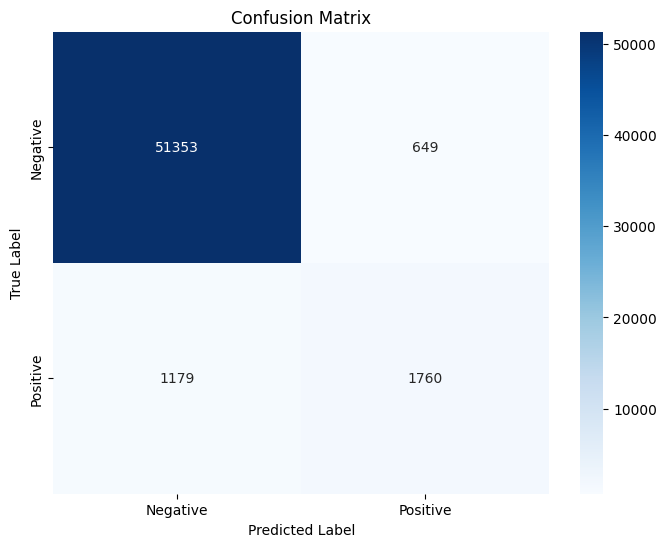

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Number of of TN, FP, FN, TP of predicted diagnoses

def plot_confusion_matrix(y_test, predictions):
    """
        Top left - (Negative-Negative) - True Negative
        Top right - (Positive-Negative) - False Positive
        Bottom left - (Negative-Positive) - False Negative
        Bottom right - (Positive-Positive) - True Positive
    
    """
    classes = ["Negative", "Positive"]

    matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(y_test, pred)

## Initial interpretation

- Model exhibits high performance for correctly classifying negative diagnoses, as expected given the class imbalance.
- False positives is low, indicating there are fewer instances of producing false diagnoses.
- Significantly more FN than FP - indicating the model is more likely to miss actual positive cases (FN) than to than to misdiagnose (FP)

- Expected to see this type of distribution, given the heavy class imbalance
- Difference between TP and FN is not that far off, given the small subset of positive diagnoses overall. This is a strong indicator that the model struggles to diagnose for actual positive cases.

In [45]:
predicted_probabilities[:, -1]

array([0.01653541, 0.01653541, 0.01653541, ..., 0.99799337, 0.01653541,
       0.02518526])

In [46]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, predicted_probabilities[:, -1])

In [47]:
y_test

267506    0
210664    0
33542     0
232328    0
254684    0
         ..
87890     0
203900    0
256779    1
271317    0
239038    1
Name: encoded_corona_result, Length: 54941, dtype: int64

In [48]:
def plot_precision_recall(precision, recall, thresholds):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

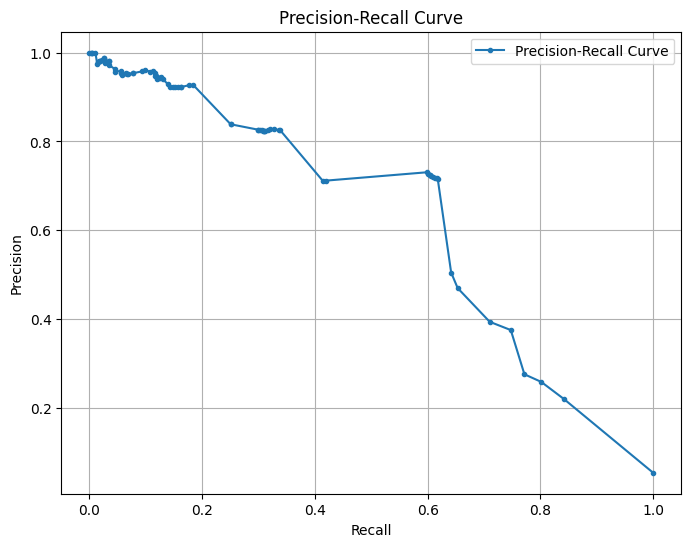

In [49]:
plot_precision_recall(*precision_recall_curve(y_test, predicted_probabilities[:, -1]))